# Mini Project 3: Machine Learning for Prediction by Regression

In the file house-data.csv you will find data from the property market in King County, USA. Your task is to use the data for training a regression model that can be used for prediction of prices of properties not listed in the file.

In [193]:
import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import shapiro
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/foxdocs/cph-bi-2024/main/Data/house-data.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [19]:
df_dropped_date = df.drop(columns="date")

In [33]:
corr_matrix = df_dropped_date.corr()
print(corr_matrix['price'].sort_values(ascending=False))  # Tjek korrelation med pris

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


### removing the columns which have low correlation

In [52]:
df_with_high_corr = df_dropped_date.drop(columns=['zipcode','id','long','condition','yr_built', 'sqft_lot15','sqft_lot', 'yr_renovated', 'floors', 'waterfront' ])

In [45]:
df_with_corr_over_0_5 = df_with_highest_corr.drop(columns=['lat', 'bedrooms', 'sqft_basement', 'view' ])

In [47]:
df_with_corr_over_0_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   waterfront     21613 non-null  int64  
 4   grade          21613 non-null  int64  
 5   sqft_above     21613 non-null  int64  
 6   sqft_living15  21613 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


### Experimenting regression types Linear, Multiple and Polynomial regression

In [275]:
# split df_shuffled into X and y
DV = 'price' # Save the DV as DV
X = df_with_corr_over_0_5.drop(DV, axis=1) # get features (X)
y = df_with_high_corr[DV] # get DV (y)

In [277]:
X.shape

(21613, 6)

In [279]:
# split X and y into testing and training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# test_size means the percent of the data we use for training
# normally test is made with a split of 80/20 or 75/25... biggest part for traning small part for test

In [281]:
X_train.shape

(16209, 6)

In [283]:
# instantiate linear regression model. Building an instance of LinearRegression class called "model".
# this class has a lot of methods. all ML classes that has fit method
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [285]:
# fit model to training data
#This method takes the columns and tries to make the best reg line for training.
model.fit(X_train, y_train)

#this method returns the queficions

LinearRegression()

In [287]:
# extract the intercept (intercept er b i "y= ax+b")
intercept = model.intercept_
intercept

-619094.8812259956

In [289]:
# extract the coefficient
coefficient = model.coef_
coefficient

array([-2.99827365e+04,  2.31845695e+02,  7.90038691e+05,  1.07722224e+05,
       -7.32212504e+01,  2.01798741e+01])

### Now we have the coefficient and intercept values and would be able to predict the price

In [292]:
# print the formula
print('Price = {0:0.2f} + ({1:0.2f} x Variables)'.format(intercept, coefficient[0]))

Price = -619094.88 + (-29982.74 x Variables)


In [294]:
# generate predictions on the test data
y_predictions = model.predict(X_test)

y_predictions

array([ 551804.25340247,  738918.63050282, 1163774.23110859, ...,
        585444.82230989, 1197840.07609952,  500178.1352844 ])

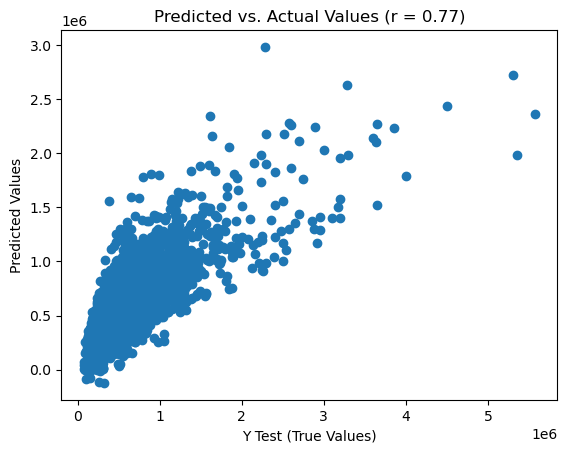

In [296]:
# plot correlation of predicted and actual values
plt.scatter(y_test, y_predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, y_predictions)[0], 2))
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5404.
  res = hypotest_fun_out(*samples, **kwds)


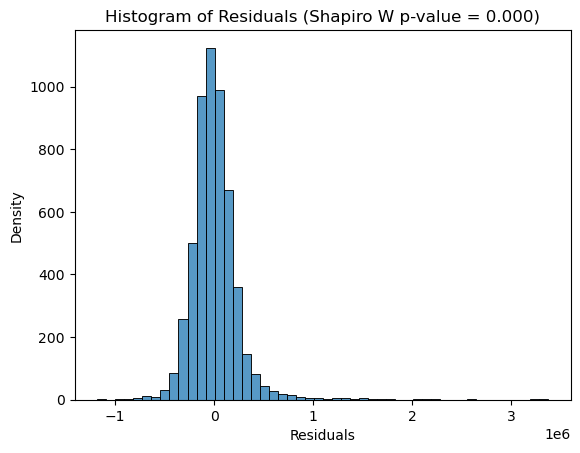

In [298]:
# plot distribution of residuals
import seaborn as sns

sns.histplot((y_test - y_predictions), bins = 50)
plt.xlabel('Residuals') # Residuals means error... or the difference
plt.ylabel('Density')
plt.title('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - y_predictions)[1]))
plt.show()

In [300]:
# compute metrics and put into a dataframe
metrics_df = pd.DataFrame({'Metric': ['MAE', 
                                      'MSE', 
                                      'RMSE', 
                                      'R-Squared'],
                          'Value': [metrics.mean_absolute_error(y_test, y_predictions),
                                    metrics.mean_squared_error(y_test, y_predictions),
                                    np.sqrt(metrics.mean_squared_error(y_test, y_predictions)),
                                    metrics.explained_variance_score(y_test, y_predictions)]}).round(3)
print(metrics_df)

      Metric         Value
0        MAE  1.603786e+05
1        MSE  6.085840e+10
2       RMSE  2.466950e+05
3  R-Squared  5.930000e-01


## Multiple Linear Regression

In [303]:
df_with_high_corr.head()

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,0,8,1680,0,47.6168,1800


In [305]:
# Opdel data
X = df_with_high_corr.drop(columns='price')  # Udvalgte features
y = df_with_high_corr['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Byg model
model.fit(X_train, y_train)

# Prædiktion og evaluering
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Beregn R-Squared
r2 = r2_score(y_test, y_pred)
print(f'R-Squared: {r2}')

MSE: 54370341699.15424
R-Squared: 0.6403524002640275


In [307]:
# Kontroller hvilke features modellen blev trænet med
trained_features = X_train.columns

# Udskriv feature-navne fra de nye data
print(new_house_data.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')


In [309]:
# Nye data (erstat med de relevante værdier for huset)
new_house_data = pd.DataFrame({
    'bedrooms': [3],
    'bathrooms': [1.00],
    'sqft_living': [1180],
    'view': [0],
    'grade': [7],
    'sqft_above': [1180],
    'sqft_basement': [0],
    'lat': [47.5112],
    'sqft_living15': [1340]
})

# Forudsig pris baseret på de nye data
predicted_price = model.predict(new_house_data)
print(f'Forudset pris: {predicted_price[0]}')

Forudset pris: 273681.17571695894


## Polynomial regression

In [312]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

poly_model = make_pipeline(PolynomialFeatures(degree=2), Ridge())
poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_poly_pred)
print(f'Polynomial MSE: {mse_poly}')

# Beregn R-squared
r2_poly = r2_score(y_test, y_poly_pred)
print(f'Polynomial R-squared: {r2_poly}')

Polynomial MSE: 54490639806.76827
Polynomial R-squared: 0.6395566552989589
